In [1]:
import openmc
import numpy as np
import tokamak_radiation_environment as tre

import matplotlib.pyplot as plt

In [2]:
iter_sp = openmc.StatePoint("../reactors/iter_class/statepoint.045.h5")
arc_sp = openmc.StatePoint("../reactors/arc_class/statepoint.005.h5")

In [3]:
iter_tfcoil_spectrum = iter_sp.get_tally(id=4)
arc_tfcoil_spectrum = arc_sp.get_tally(id=4)

iter_spectrum_mean = iter_tfcoil_spectrum.mean[:,0,0]
arc_spectrum_mean = arc_tfcoil_spectrum.mean[:,0,0]

iter_spectrum_stddev = iter_tfcoil_spectrum.std_dev[:,0,0]
arc_spectrum_stddev = arc_tfcoil_spectrum.std_dev[:,0,0]

ebins = iter_tfcoil_spectrum.filters[2].bins[:,0]

In [4]:
# Specify the materials you want to plot cross sections for
ybco = tre.materials.ybco
nb3sn = tre.materials.nb3sn

In [5]:
reactions = ['(n,Xa)', '(n,Xp)', '(n,Xd)', '(n,Xt)']
E_hts, data_hts = openmc.calculate_cexs(ybco, reactions)
E_lts, data_lts = openmc.calculate_cexs(nb3sn, reactions)

[]

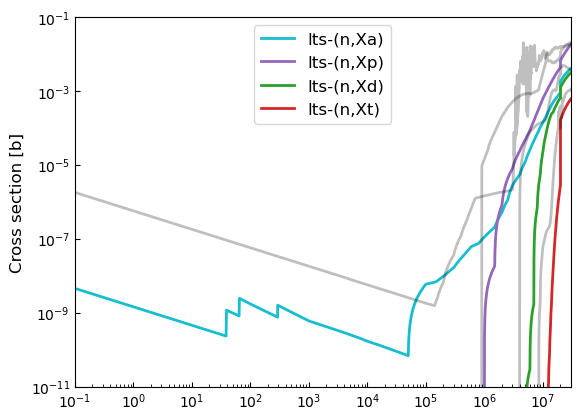

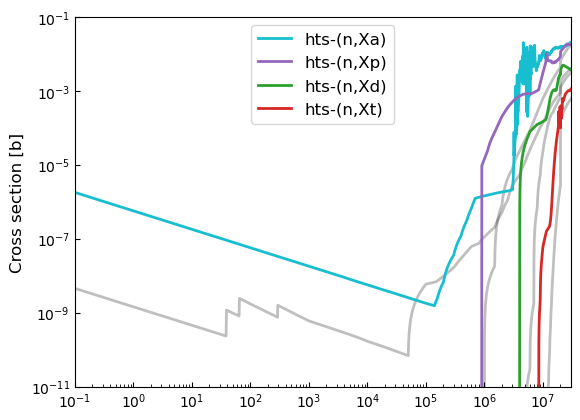

In [7]:
fig, ax = plt.subplots()
ax.plot(E_lts, data_lts[0], lw=2, c='tab:cyan', label='lts-(n,Xa)')
ax.plot(E_lts, data_lts[1], lw=2, c='tab:purple', label='lts-(n,Xp)')
ax.plot(E_lts, data_lts[2], lw=2, c='tab:green', label='lts-(n,Xd)')
ax.plot(E_lts, data_lts[3], lw=2, c='tab:red', label='lts-(n,Xt)')
ax.plot(E_hts, data_hts[0], lw=2, c='k', alpha=.25, label='_hts-(n,Xa)')
ax.plot(E_hts, data_hts[1], lw=2, c='k', alpha=.25, label='_hts-(n,Xp)')
ax.plot(E_hts, data_hts[2], lw=2, c='k', alpha=.25, label='_hts-(n,Xd)')
ax.plot(E_hts, data_hts[3], lw=2, c='k', alpha=.25, label='_hts-(n,Xt)')
ax.set_xlim(1e-1, 3e7), ax.set_ylim(1e-11, 1e-1)
ax.set_xscale('log'), ax.set_yscale('log')
ax.set_ylabel('Cross section [b]', fontsize=12)
ax.legend(loc='upper center', fontsize=12)
ax.tick_params(axis='both', which='both', direction='in')
ax.tick_params(axis='y', which='minor', direction='in')
# fig.tight_layout()
# plt.savefig('lts_xs.png', dpi=600)
plt.plot()

fig, ax = plt.subplots()
ax.plot(E_lts, data_lts[0], lw=2, c='k', alpha=.25, label='_lts-(n,Xa)')
ax.plot(E_lts, data_lts[1], lw=2, c='k', alpha=.25, label='_lts-(n,Xp)')
ax.plot(E_lts, data_lts[2], lw=2, c='k', alpha=.25, label='_lts-(n,Xd)')
ax.plot(E_lts, data_lts[3], lw=2, c='k', alpha=.25, label='_lts-(n,Xt)')
ax.plot(E_hts, data_hts[0], lw=2, c='tab:cyan', label='hts-(n,Xa)')
ax.plot(E_hts, data_hts[1], lw=2, c='tab:purple', label='hts-(n,Xp)')
ax.plot(E_hts, data_hts[2], lw=2, c='tab:green', label='hts-(n,Xd)')
ax.plot(E_hts, data_hts[3], lw=2, c='tab:red', label='hts-(n,Xt)')
ax.set_xlim(1e-1, 3e7), ax.set_ylim(1e-11, 1e-1)
ax.set_xscale('log'), ax.set_yscale('log')
ax.set_ylabel('Cross section [b]', fontsize=12)
ax.legend(loc='upper center', fontsize=12)
ax.tick_params(axis='both', which='both', direction='in')
ax.tick_params(axis='y', which='minor', direction='in')
# fig.tight_layout()
# plt.savefig('hts_xs.png', dpi=600)
plt.plot()

[]

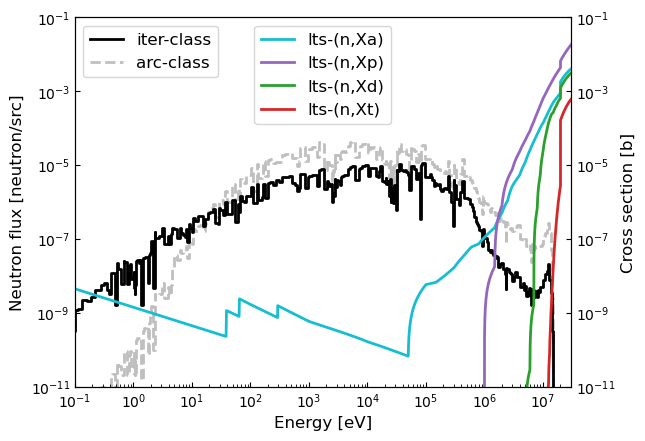

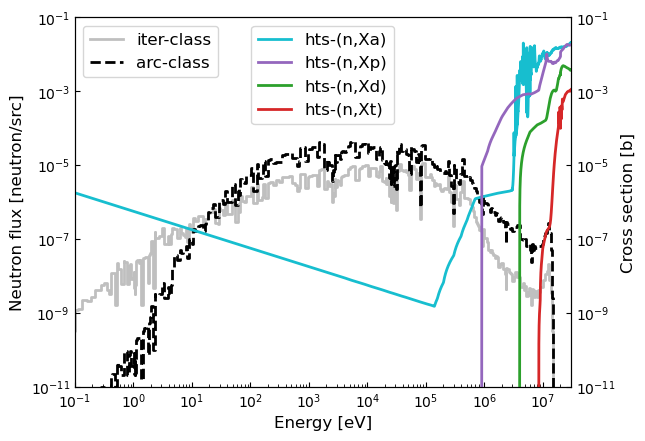

In [8]:
fig, ax = plt.subplots()
ax.plot(ebins, iter_spectrum_mean, lw=2, ls='-', c='k', drawstyle='steps-pre', label='iter-class')
ax.plot(ebins, arc_spectrum_mean, lw=2, ls='--', c='k', alpha=.25, drawstyle='steps-pre', label='arc-class')
ax.set_xlim(1e-1, 3e7), ax.set_ylim(1e-11, 1e-1)
ax.set_xscale('log'), ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=12)
ax.tick_params(axis='both', which='both', direction='in')
ax.set_xlabel('Energy [eV]', fontsize=12)
ax.set_ylabel('Neutron flux [neutron/src]', fontsize=12)
ax.tick_params(axis='both', which='both', direction='in')
ax2 = ax.twinx()
ax2.plot(E_lts, data_lts[0], lw=2, c='tab:cyan', label='lts-(n,Xa)')
ax2.plot(E_lts, data_lts[1], lw=2, c='tab:purple', label='lts-(n,Xp)')
ax2.plot(E_lts, data_lts[2], lw=2, c='tab:green', label='lts-(n,Xd)')
ax2.plot(E_lts, data_lts[3], lw=2, c='tab:red', label='lts-(n,Xt)')
ax2.set_xlim(1e-1, 3e7), ax2.set_ylim(1e-11, 1e-1)
ax2.set_xscale('log'), ax2.set_yscale('log')
ax2.set_ylabel('Cross section [b]', fontsize=12)
ax2.legend(loc='upper center', fontsize=12)
ax2.tick_params(axis='both', which='both', direction='in')
ax2.tick_params(axis='y', which='minor', direction='in')
# fig.tight_layout()
# plt.savefig('iter_xs_vs_spectra.png', dpi=600)
plt.plot()


fig, ax = plt.subplots()
ax.plot(ebins, iter_spectrum_mean, lw=2, ls='-', c='k', alpha=.25, drawstyle='steps-pre', label='iter-class')
ax.plot(ebins, arc_spectrum_mean, lw=2, ls='--', c='k', drawstyle='steps-pre', label='arc-class')
ax.set_xlim(1e-1, 3e7), ax.set_ylim(1e-11, 1e-1)
ax.set_xscale('log'), ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=12)
ax.tick_params(axis='both', which='both', direction='in')
ax.set_xlabel('Energy [eV]', fontsize=12)
ax.set_ylabel('Neutron flux [neutron/src]', fontsize=12)
ax.tick_params(axis='both', which='both', direction='in')
ax2 = ax.twinx()
ax2.plot(E_hts, data_hts[0], lw=2, c='tab:cyan', label='hts-(n,Xa)')
ax2.plot(E_hts, data_hts[1], lw=2, c='tab:purple', label='hts-(n,Xp)')
ax2.plot(E_hts, data_hts[2], lw=2, c='tab:green', label='hts-(n,Xd)')
ax2.plot(E_hts, data_hts[3], lw=2, c='tab:red', label='hts-(n,Xt)')
ax2.set_xlim(1e-1, 3e7), ax2.set_ylim(1e-11, 1e-1)
ax2.set_xscale('log'), ax2.set_yscale('log')
ax2.set_ylabel('Cross section [b]', fontsize=12)
ax2.legend(loc='upper center', fontsize=12)
ax2.tick_params(axis='both', which='both', direction='in')
# plt.savefig('arc_xs_vs_spectra.png', dpi=600)
plt.plot()